# MainQuest1
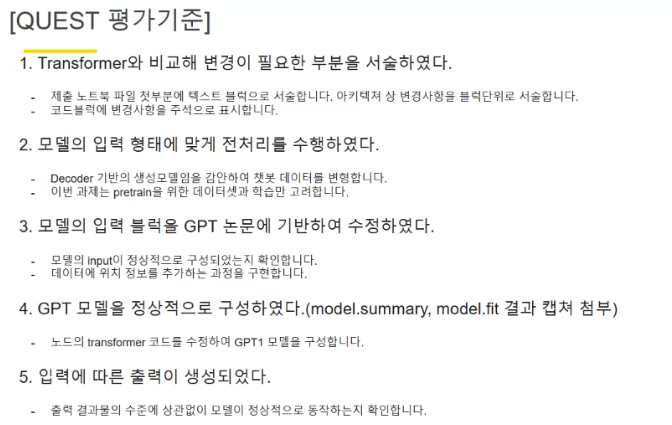

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
data = pd.read_csv('../../Exploration/Ex07/data/data.csv', encoding ='cp949')

In [3]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [7]:
print(len(data))

11823


In [5]:
# 전처리 함수
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    
    # 구두점과의 거리를 만듭니다 (예: "I am a student." -> "I am a student .")
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    
    # 공백이 두 개 이상일 때 하나로 치환
    sentence = re.sub(r'[" "]+', " ", sentence)
    
    # 한글과 영어, 구두점(. , ? !)을 제외한 모든 문자를 공백으로 대체
    sentence = re.sub(r'[^a-zA-Z0-9.,?!가-힣]', ' ', sentence)
    
    sentence = sentence.strip()
    return sentence

In [9]:
import re
questions = data['Q'].apply(preprocess_sentence).tolist()
answers = data['A'].apply(preprocess_sentence).tolist()

In [12]:
# 사전 생성
import tensorflow_datasets as tfds
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [13]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [14]:
VOCAB_SIZE = tokenizer.vocab_size + 2

In [15]:
MAX_LENGTH = 22